In [1]:
%load_ext autoreload
%autoreload 2
from dataset import iterable_dataset, vae_feature_dataset
from models.music_generation_gru import MusicGRU
import os
from utils import training_rnn, data_reading
import torch
from torch.utils.data import DataLoader
import pickle
import matplotlib.pyplot as plt
from utils import data_reading, music_generation
from models import feature_prediction_gru
from dataset import iterable_dataset

In [2]:
FEATURE_DIRPATH = "./saved_model_and_data/transformed_features/bass"
TRAIN_SPLIT = 0.95
SEQ_LEN = 48
RESOLUTION = 12
TRACK_ORDER = ["Bass", "Piano"]
FILES_TO_READ = 99999
BATCH_SIZE = 64
LATENT_SIZE = 513
HIDDEN_SIZE = 512
N_LAYER = 3
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
LR_LAMBDA = 1
LR = 0.0001
ALPHA = 0
AUTO_SAVE = False
SAVE_ON_EPOCH = 1

In [3]:
all_feature_files = data_reading.read_all_npys(FEATURE_DIRPATH, True)

In [4]:
train_len = round(len(all_feature_files)*TRAIN_SPLIT)
train_files_list = all_feature_files[:train_len]
test_files_list = all_feature_files[train_len:]

In [5]:
train_dataset = vae_feature_dataset.IterableSongDataset(train_files_list, SEQ_LEN, TRACK_ORDER, FILES_TO_READ, RESOLUTION)
test_dataset = vae_feature_dataset.IterableSongDataset(test_files_list, SEQ_LEN, TRACK_ORDER, FILES_TO_READ, RESOLUTION)
train_loader = DataLoader(train_dataset, batch_size = BATCH_SIZE, drop_last=True)
test_loader = DataLoader(test_dataset, batch_size = BATCH_SIZE, drop_last=True)

In [6]:
model = feature_prediction_gru.FeaturePredictionGRU(["Bass"], LATENT_SIZE, HIDDEN_SIZE, BATCH_SIZE, N_LAYER, DEVICE).to(DEVICE)

In [7]:
optimizer = torch.optim.Adam(model.parameters(), lr=LR)
scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda = lambda epoch: LR_LAMBDA ** epoch)
criterion = torch.nn.MSELoss()

In [8]:
EPOCH = 80
train_losses, test_losses = training_rnn.training_rnn(model, optimizer, scheduler, criterion, train_loader, test_loader, EPOCH, DEVICE, BATCH_SIZE, 
                         ALPHA, AUTO_SAVE, SAVE_ON_EPOCH)

[0.0001]
start test
Epoch 1, Train Loss: 0.5067480479306843, Test Loss: 0.47880328785289417, Time: 2022-04-26 14:57:56.829587
[0.0001]
start test
Epoch 2, Train Loss: 0.472644465627955, Test Loss: 0.46456100994890387, Time: 2022-04-26 14:58:42.585590
[0.0001]
start test
Epoch 3, Train Loss: 0.4632990544115133, Test Loss: 0.4584335440939123, Time: 2022-04-26 14:59:28.379587
[0.0001]
start test
Epoch 4, Train Loss: 0.45695345504070395, Test Loss: 0.4537877535278147, Time: 2022-04-26 15:00:14.151587
[0.0001]
start test
Epoch 5, Train Loss: 0.4513992324693879, Test Loss: 0.4498057947917418, Time: 2022-04-26 15:01:00.147088
[0.0001]
start test
Epoch 6, Train Loss: 0.44614691075994006, Test Loss: 0.4463205472989516, Time: 2022-04-26 15:01:46.098588
[0.0001]
start test
Epoch 7, Train Loss: 0.44101980106154487, Test Loss: 0.44319988651709125, Time: 2022-04-26 15:02:31.918587
[0.0001]
start test
Epoch 8, Train Loss: 0.43589527148809004, Test Loss: 0.4400240304795178, Time: 2022-04-26 15:03:17.5

start test
Epoch 66, Train Loss: 0.24552457872314834, Test Loss: 0.3666631850329312, Time: 2022-04-26 15:23:52.497587
[0.0001]
start test
Epoch 67, Train Loss: 0.24432061082539866, Test Loss: 0.36603877219286834, Time: 2022-04-26 15:24:04.290587
[0.0001]
start test
Epoch 68, Train Loss: 0.24332853551231212, Test Loss: 0.366341849619692, Time: 2022-04-26 15:24:15.967587
[0.0001]
start test
Epoch 69, Train Loss: 0.2417268229287062, Test Loss: 0.3657037195834247, Time: 2022-04-26 15:24:27.634088
[0.0001]
start test
Epoch 70, Train Loss: 0.24006527510300205, Test Loss: 0.36642261120406067, Time: 2022-04-26 15:24:39.364588
[0.0001]
start test
Epoch 71, Train Loss: 0.23791298003339056, Test Loss: 0.3678435019471429, Time: 2022-04-26 15:24:50.977087
[0.0001]
start test
Epoch 72, Train Loss: 0.23591252727739848, Test Loss: 0.36634919995611365, Time: 2022-04-26 15:25:02.524589
[0.0001]
start test
Epoch 73, Train Loss: 0.23444574266968676, Test Loss: 0.36519682678309356, Time: 2022-04-26 15:25:1

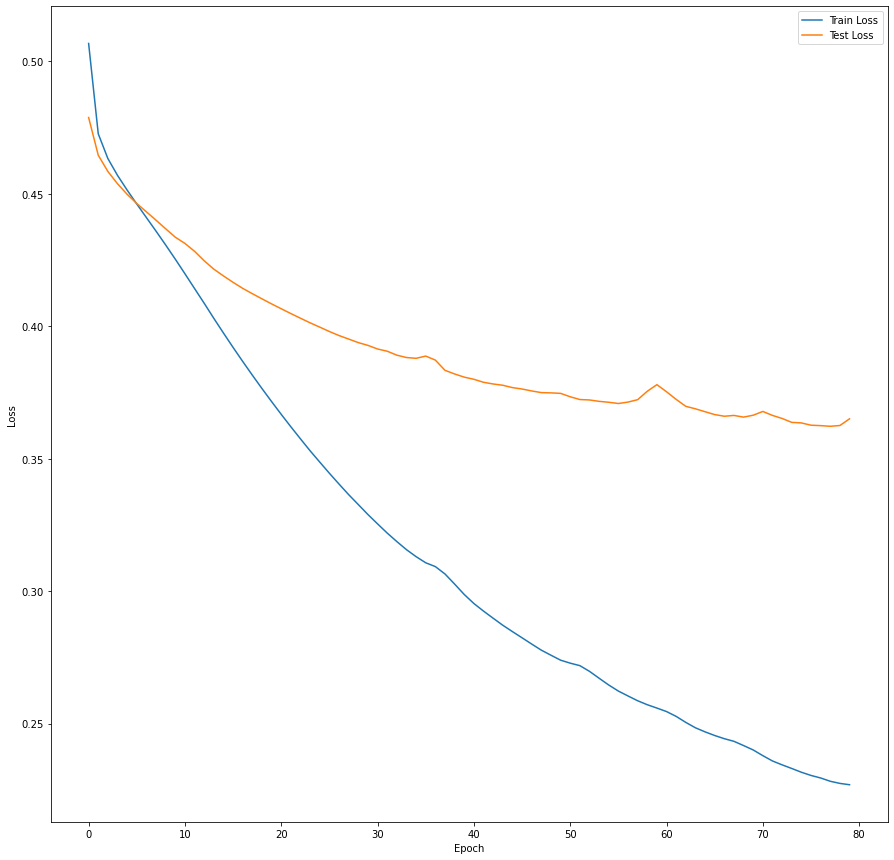

In [9]:
plt.rcParams["figure.figsize"] = (15,15)
plt.plot(train_losses, label = 'Train Loss')
plt.plot(test_losses, label = 'Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [10]:
STRINGS_SAVE_PATH = f"./saved_model_and_data/learner/bass_based_on_piano/bass_learner_epoch{EPOCH}"
torch.save(model.state_dict(), STRINGS_SAVE_PATH) 